# PRICING

# Pricing Problem

A Pricing Problem consists on proposing a price to a given customer, receiving a positive outcome or a negative outcome.
we want to estimate the Demand Curve of the Customers based on the different prices that are offered to them.
Because the set of possible prices is continuos, we discretize it with integer values, choosing only five of them.
We have chosen the prices for our product as 5, 10 ,15, 20, 25 euros.

### Our Scenario

Each customer has been modeled having two different binary attributes, Age (Young, Adult) and Familiarity with the product offered (Familiar, Unfamiliar).
Our assumption is that, given the nature of the product (subscription with a streaming channel like Netflix or Disney+), the three most common classes of customers that will arrive at our site would be:
(Young, Familiar), (Young, Unfamiliar), (Adult, Familiar), called respectively "yf", "yu", "af".

### Aggregate and Disaggregate Demand Curves

in the next sections, we'll explore the distinct solutions for the problem of learning the Aggregate and Disaggregate Demand Curve, using the Thompson Sampling Multi Armed Bandit.

## Multi Armed Bandit - Thompson Sampling

We use a Thompson Sampling Algorithm to choose the price to propose to each client.
TS will learn a Beta Distributions for each price, adjusting the relative parameters $\alpha_{price}$ and $\beta_{price}$ with the outcomes of the proposed price.

### Thompson Sampling
1. At every time $t$, for every arm $a$

$θ^{˜}_{a}$ ← 𝖲𝖺𝗆𝗉𝗅𝖾 (ℙ($μ_{a}$ = $θ_{a}$)) (Beta Distribution)

2. At every $t$ play $a$ such that:

$a_{t}$ ← $argmax_{a∈A}${$θ^{˜}_{a}$ x $price_{a}$}
3. Update the Beta distribution of arm as:

$(α_{a_{t}}, β_{a_{t}}) ← (α_{a_{t}}, β_{a_{t}}) + (x_{a_{t},t}, 1 − x_{a_{t},t})$


### Regret Formula

## PART 4 - Aggregate Demand Curve 

In [1]:
from experiment4_5 import *
#arms_candidates = [5, 10, 15, 20, 25]
n_experiments = 20
horizon = 5000 ## how many people are used to perform each experiment
pricing_env_id = 0

### Run Experiment

In [2]:
exp4 = Experiment_4_5(pricing_env_id)

In [3]:
exp4.run_experiment(n_experiments, horizon) # no week paseed -> No context generation

Performing experiment: 1
Context Manager creato
Creato context_id 0
len(rewards_log) = 0
subspace = [('y', 'f'), ('y', 'u'), ('a', 'f'), ('a', 'u')]
beta_parameters 
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]

context 0
len(context.rewards_log) = 5000
context.subspace = [('y', 'f'), ('y', 'u'), ('a', 'f'), ('a', 'u')]
context.learner.beta_parameters = 
[[   1    1]
 [3625 1274]
 [  13   39]
 [   5   29]
 [   1   22]]
Fine experiment 0
len(experiment_log) = 5000
Performing experiment: 2
Context Manager creato
Creato context_id 0
len(rewards_log) = 0
subspace = [('y', 'f'), ('y', 'u'), ('a', 'f'), ('a', 'u')]
beta_parameters 
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]

context 0
len(context.rewards_log) = 5000
context.subspace = [('y', 'f'), ('y', 'u'), ('a', 'f'), ('a', 'u')]
context.learner.beta_parameters = 
[[   5    1]
 [3530 1338]
 [  18   46]
 [   8   41]
 [   1   22]]
Fine experiment 1
len(experiment_log) = 5000
Performing experiment: 3
Context Manager creato
Creato context_id 0
len(rewards_lo


context 0
len(context.rewards_log) = 5000
context.subspace = [('y', 'f'), ('y', 'u'), ('a', 'f'), ('a', 'u')]
context.learner.beta_parameters = 
[[   2    1]
 [3523 1268]
 [  55   86]
 [  10   43]
 [   1   21]]
Fine experiment 19
len(experiment_log) = 5000
len(self.experiments_logs) = 20


### Regret without Context Generation

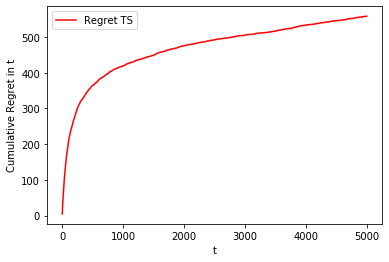

In [4]:
exp4.plot_regret_nocontext()

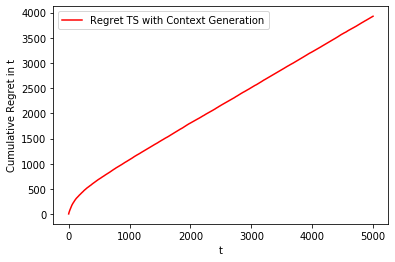

In [5]:
exp4.plot_regret_context()

In [ ]:
exp4.plot_reward()

## PART 5 - Disaggregate Demand Curve

## Context Generation

After a certain number of customers analyzed by the Learning Algorithm, the space of features is split into different contexts, if it is respected the split condition.

## Split Condition
Split if it is true for the context:

$p_{c_{1}}μ_{a^{*}_{c1},c1} + p_{c_{2}}μ_{a^{*}_{c2},c2}$ $\geq$ $μ_{a^{*}_{c0},c0}$


### Run Experiment

We now run 5 experiments with the same number of customers, doing the split at each week.

Number of customers: 5000, week = 150, number of experiments = 5

In [7]:
exp5 = Experiment_4_5(pricing_env_id)
## week says how many people arrives each week, at the end end of a week there is a context split

In [8]:
exp5.run_experiment(n_experiments, horizon, week = 1200)

Performing experiment: 1
Context Manager creato
Creato context_id 0
len(rewards_log) = 0
subspace = [('y', 'f'), ('y', 'u'), ('a', 'f'), ('a', 'u')]
beta_parameters 
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
1199
context 0
len(context.rewards_log) = 1199
context.subspace = [('y', 'f'), ('y', 'u'), ('a', 'f'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [641 244]
 [119 160]
 [  1  14]
 [  2  26]]
0 [('y', 'f'), ('y', 'u'), ('a', 'f'), ('a', 'u')]


2399
context 0
len(context.rewards_log) = 2399
context.subspace = [('y', 'f'), ('y', 'u'), ('a', 'f'), ('a', 'u')]
context.learner.beta_parameters = 
[[   1    1]
 [1529  534]
 [ 125  171]
 [   2   16]
 [   2   28]]
0 [('y', 'f'), ('y', 'u'), ('a', 'f'), ('a', 'u')]


3599
Creato context_id 1
len(rewards_log) = 1207
subspace = [('a', 'f'), ('a', 'u')]
beta_parameters 
[[  1   1]
 [920 163]
 [ 82  26]
 [  4   8]
 [  2  10]]
Creato context_id 0
len(rewards_log) = 2392
subspace = [('y', 'f'), ('y', 'u')]
beta_parameters 
[[   1    1]
 [

4799
context 0
len(context.rewards_log) = 1601
context.subspace = [('y', 'f')]
context.learner.beta_parameters = 
[[   1    1]
 [1134  370]
 [  23   53]
 [   1   14]
 [   1   13]]
context 1
len(context.rewards_log) = 1551
context.subspace = [('y', 'u'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [888 595]
 [  7  28]
 [  1  17]
 [  1  22]]
context 2
len(context.rewards_log) = 1647
context.subspace = [('a', 'f')]
context.learner.beta_parameters = 
[[  1   1]
 [947 167]
 [336 145]
 [ 16  28]
 [  2  14]]
0 [('y', 'f')]
1 [('y', 'u'), ('a', 'u')]
2 [('a', 'f')]



context 0
len(context.rewards_log) = 1678
context.subspace = [('y', 'f')]
context.learner.beta_parameters = 
[[   1    1]
 [1187  391]
 [  23   53]
 [   1   15]
 [   1   15]]

context 1
len(context.rewards_log) = 1620
context.subspace = [('y', 'u'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [926 626]
 [  7  28]
 [  1  17]
 [  1  22]]

context 2
len(context.rewards_log) = 1702
context.subspace = [('

context 0
len(context.rewards_log) = 809
context.subspace = [('y', 'f')]
context.learner.beta_parameters = 
[[  1   1]
 [530 182]
 [ 30  46]
 [  1  15]
 [  1  12]]
context 1
len(context.rewards_log) = 772
context.subspace = [('y', 'u'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [421 302]
 [  2  15]
 [  2  18]
 [  1  19]]
context 2
len(context.rewards_log) = 818
context.subspace = [('a', 'f')]
context.learner.beta_parameters = 
[[  1   1]
 [613 120]
 [ 46  24]
 [  4   8]
 [  2   9]]
0 [('y', 'f')]
1 [('y', 'u'), ('a', 'u')]
2 [('a', 'f')]


3599
context 0
len(context.rewards_log) = 1211
context.subspace = [('y', 'f')]
context.learner.beta_parameters = 
[[  1   1]
 [828 273]
 [ 31  52]
 [  1  15]
 [  1  18]]
context 1
len(context.rewards_log) = 1180
context.subspace = [('y', 'u'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [654 471]
 [  2  17]
 [  2  20]
 [  1  21]]
context 2
len(context.rewards_log) = 1208
context.subspace = [('a', 'f')]
context.learner.

3599
context 0
len(context.rewards_log) = 1222
context.subspace = [('y', 'f')]
context.learner.beta_parameters = 
[[  1   1]
 [840 305]
 [ 11  27]
 [  6  27]
 [  1  13]]
context 1
len(context.rewards_log) = 1207
context.subspace = [('a', 'f'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [298  51]
 [569 257]
 [  6  17]
 [  2  15]]
context 2
len(context.rewards_log) = 1170
context.subspace = [('y', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [672 430]
 [  1  37]
 [  2  18]
 [  1  17]]
0 [('y', 'f')]
1 [('a', 'f'), ('a', 'u')]
2 [('y', 'u')]


4799
context 0
len(context.rewards_log) = 1624
context.subspace = [('y', 'f')]
context.learner.beta_parameters = 
[[   1    1]
 [1145  393]
 [  11   28]
 [   8   31]
 [   1   15]]
context 1
len(context.rewards_log) = 1630
context.subspace = [('a', 'f'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [298  51]
 [864 382]
 [  6  19]
 [  2  16]]
context 2
len(context.rewards_log) = 1545
context.subspace = [('y', 'u')

3599
context 0
len(context.rewards_log) = 1178
context.subspace = [('y', 'f')]
context.learner.beta_parameters = 
[[  1   1]
 [830 268]
 [  9  33]
 [  6  24]
 [  1  15]]
context 1
len(context.rewards_log) = 1215
context.subspace = [('y', 'u'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [702 464]
 [  2  20]
 [  1  17]
 [  1  16]]
context 2
len(context.rewards_log) = 1206
context.subspace = [('a', 'f')]
context.learner.beta_parameters = 
[[  1   1]
 [626 124]
 [302 115]
 [  7  21]
 [  3  16]]
0 [('y', 'f')]
1 [('y', 'u'), ('a', 'u')]
2 [('a', 'f')]


4799
context 0
len(context.rewards_log) = 1608
context.subspace = [('y', 'f')]
context.learner.beta_parameters = 
[[   1    1]
 [1147  376]
 [   9   33]
 [   6   27]
 [   1   17]]
context 1
len(context.rewards_log) = 1592
context.subspace = [('y', 'u'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [933 608]
 [  2  20]
 [  1  17]
 [  1  18]]
context 2
len(context.rewards_log) = 1599
context.subspace = [('a', 'f')

3599
Creato context_id 2
len(rewards_log) = 1205
subspace = [('y', 'u')]
beta_parameters 
[[  1   1]
 [738 438]
 [  3  13]
 [  2   9]
 [  1   9]]
Creato context_id 0
len(rewards_log) = 1204
subspace = [('y', 'f')]
beta_parameters 
[[  1   2]
 [875 291]
 [  6  15]
 [  1   9]
 [  1  13]]
context 0
len(context.rewards_log) = 1204
context.subspace = [('y', 'f')]
context.learner.beta_parameters = 
[[  1   2]
 [875 291]
 [  6  15]
 [  1   9]
 [  1  13]]
context 1
len(context.rewards_log) = 1190
context.subspace = [('a', 'f'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [308  63]
 [558 239]
 [  4  15]
 [  1  10]]
context 2
len(context.rewards_log) = 1205
context.subspace = [('y', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [738 438]
 [  3  13]
 [  2   9]
 [  1   9]]
0 [('y', 'f')]
1 [('a', 'f'), ('a', 'u')]
2 [('y', 'u')]


4799
context 0
len(context.rewards_log) = 1596
context.subspace = [('y', 'f')]
context.learner.beta_parameters = 
[[   1    2]
 [1169  379]
 [   6 

3599
Creato context_id 1
len(rewards_log) = 1251
subspace = [('y', 'u'), ('a', 'u')]
beta_parameters 
[[  1   1]
 [716 508]
 [  2  12]
 [  1  11]
 [  1   8]]
Creato context_id 0
len(rewards_log) = 2348
subspace = [('y', 'f'), ('a', 'f')]
beta_parameters 
[[   2    1]
 [1825  467]
 [  13   19]
 [   3   15]
 [   1   12]]
context 0
len(context.rewards_log) = 2348
context.subspace = [('y', 'f'), ('a', 'f')]
context.learner.beta_parameters = 
[[   2    1]
 [1825  467]
 [  13   19]
 [   3   15]
 [   1   12]]
context 1
len(context.rewards_log) = 1251
context.subspace = [('y', 'u'), ('a', 'u')]
context.learner.beta_parameters = 
[[  1   1]
 [716 508]
 [  2  12]
 [  1  11]
 [  1   8]]
0 [('y', 'f'), ('a', 'f')]
1 [('y', 'u'), ('a', 'u')]


4799
context 0
len(context.rewards_log) = 3134
context.subspace = [('y', 'f'), ('a', 'f')]
context.learner.beta_parameters = 
[[   2    1]
 [2386  610]
 [  54   52]
 [   3   19]
 [   1   16]]
context 1
len(context.rewards_log) = 1665
context.subspace = [('y',

## Regret with Context Generation

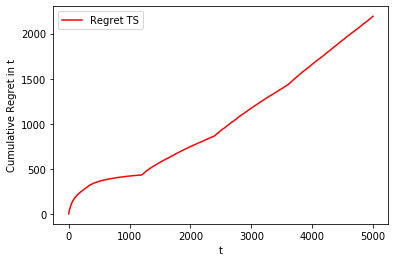

In [9]:
exp5.plot_regret_nocontext()
# valuto context generation con la regret del no context

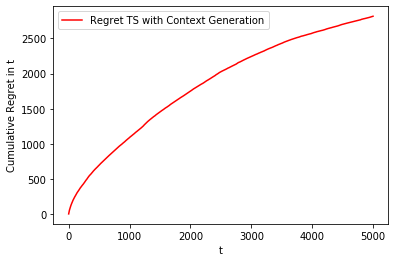

In [10]:
exp5.plot_regret_context()

In [ ]:
exp5.plot_reward()

### Results Analysis

We can clearly see that, using the Thompson Sampling combined with the Context Generation, the Regret stabilyzes quickly at a maximum, without increase. 
Indeed, the learning algorithm has learnt to offer the optimal candidates for each context. 
In some experiments it has learned to split the classes into three different context, or only two. 
This is caused by the random arrival of customers in each experiment.